In [2]:
import cv2
import hashlib
from PIL import Image


# Load Image

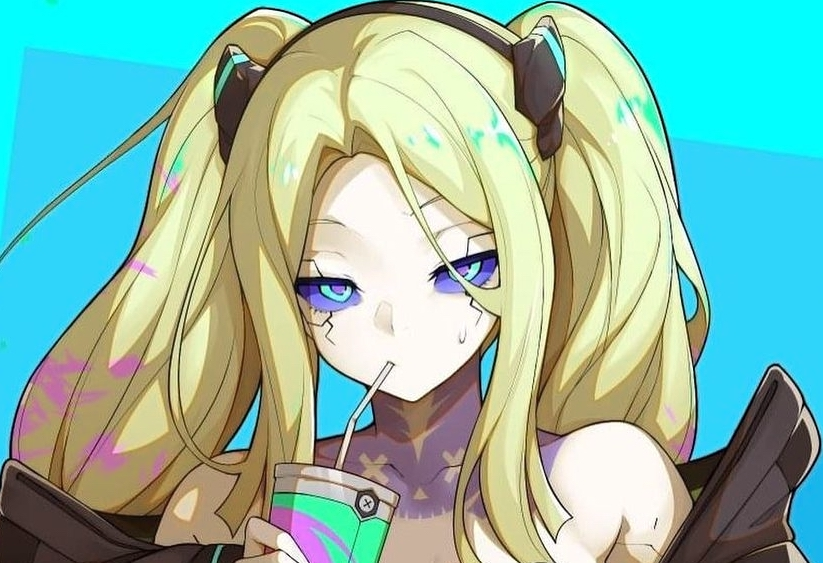

In [3]:
im_path = "C:/Users/Faisal/Downloads/rebecca.jpg"

image = cv2.imread(im_path)

display(Image.fromarray(image))


# Split Image into Parts

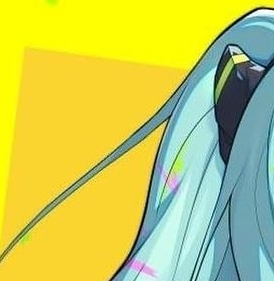

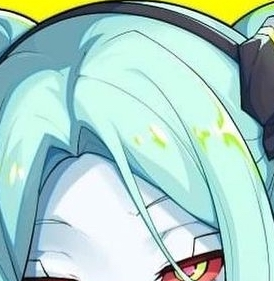

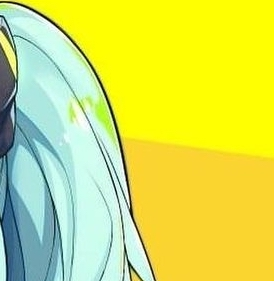

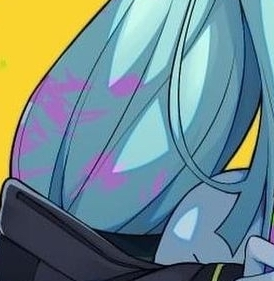

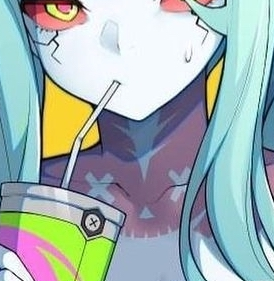

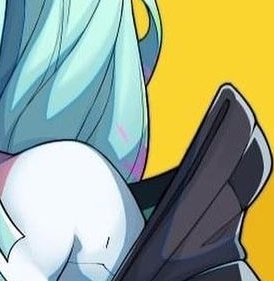

In [4]:
import cv2
import numpy as np
from PIL import Image

def split_image_into_parts(image, cols=3, rows=2):

    height, width, _ = image.shape # _ chennal ko represt kar raha ha 
    part_height = height // rows
    part_width = width // cols

    parts = []

    for row in range(rows):
        for col in range(cols):
            y = row * part_height
            x = col * part_width
            part = image[y:y+part_height, x:x+part_width]
            parts.append(part)

    return parts

# Assuming you have already loaded the image into the 'image' variable

im_parts = split_image_into_parts(image, cols=3, rows=2)

# Display the image parts one by one

for part in im_parts:
    pil_image = Image.fromarray(cv2.cvtColor(part, cv2.COLOR_BGR2RGB))
    display(pil_image)

# Joining Back of Parts

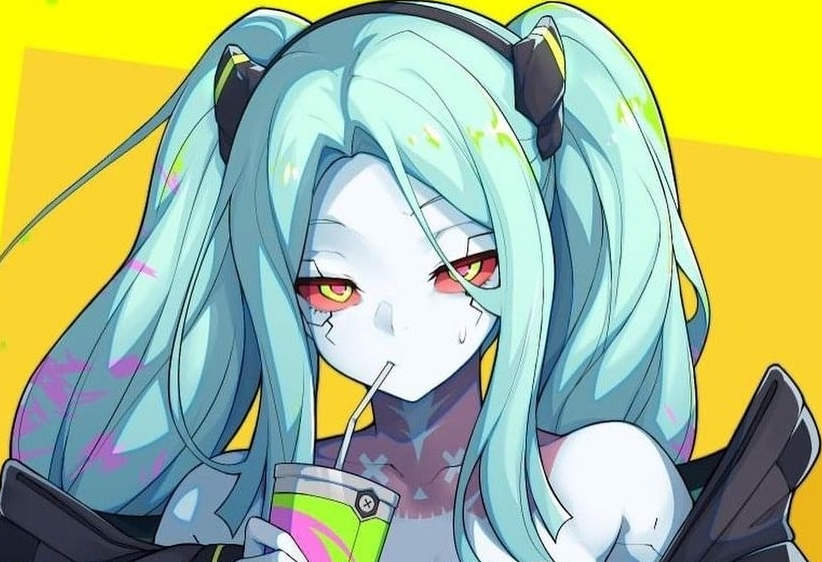

In [20]:
def join_image_parts(image_parts, cols=3, rows=2):
    part_height, part_width, _ = image_parts[0].shape
    height = part_height * rows
    width = part_width * cols
    
    joined_image = np.zeros((height, width, 3), dtype=np.uint8)
    
    for idx, part in enumerate(image_parts):
        row = idx // cols
        col = idx % cols
        y_start = row * part_height
        y_end = y_start + part_height
        x_start = col * part_width
        x_end = x_start + part_width
        joined_image[y_start:y_end, x_start:x_end] = part
    
    return joined_image


# Assuming you have already loaded the image into the 'image' variable

im_parts = split_image_into_parts(image, cols=3, rows=2)

# Join the image parts back together
joined_image = join_image_parts(im_parts, cols=3, rows=2)

# Display the joined image
pil_image = Image.fromarray(cv2.cvtColor(joined_image, cv2.COLOR_BGR2RGB))
display(pil_image)


# Save joined Image


In [26]:
# your code here
joined_image_path = "C:/Users/Faisal/Downloads/joined_image.jpg"
cv2.imwrite(joined_image_path, joined_image)
# img = cv2.imread(joined_image_path)
# display(Image.fromarray(img))

True

# Compare Original and Saved Image Hashes (should be same)

In [29]:
def get_hash(file_path):
    return hashlib.md5(cv2.imread(file_path).tobytes()).hexdigest()

# Compare Hashes

original_image_hash = get_hash(im_path)
saved_image_hash = get_hash(joined_image_path)

print("Hash of original Image:",get_hash(im_path))
print("Hash of New Image:",get_hash(joined_image_path))


Hash of original Image: bf75c3e868ea5c763df58a56938c6a53
Hash of New Image: fb446d49d5d018f77833578a7e2dced7
